<div class="alert alert-block alert-info" style="margin-top: 20px">
    <a href="https://github.com/dd-consulting">
         <img src="../reference/GZ_logo.png" width="60" align="right">
    </a>
    <h1>
        One-Stop Analytics: Central Limit Theorem (CLT) & Confidence Interval (CI)
    </h1>
</div>


# Case Study of Autism Spectrum Disorder (ASD) with R

---

![](../reference/CDC_ASD/CDC_ASD_01.jpg)

![](../reference/CDC_ASD/CDC_ASD_02.png)


## <span style="color:blue">[ United States ]</span> 

## Centers for Disease Control and Prevention (CDC) - Autism Spectrum Disorder (ASD)

Autism spectrum disorder (ASD) is a developmental disability that can cause significant social, communication and behavioral challenges. CDC is committed to continuing to provide essential data on ASD, search for factors that put children at risk for ASD and possible causes, and develop resources that help identify children with ASD as early as possible.

https://www.cdc.gov/ncbddd/autism/data/index.html


## <span style="color:blue">[ Singapore ]</span> 

## TODAY Online - More preschoolers diagnosed with developmental issues

Doctors cited better awareness among parents and preschool teachers, leading to early referrals for diagnosis.

https://www.gov.sg/news/content/today-online-more-preschoolers-diagnosed-with-developmental-issues

![](../reference/SG_ASD/SG_ASD_01.png)



![](../reference/SG_ASD/SG_ASD_04.png) 

https://www.pathlight.org.sg/

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <a href="">
    </a>
</div>


# Workshop Objective: 

## Use R to analyze Autism Spectrum Disorder (ASD) data from CDC USA. 

https://www.cdc.gov/ncbddd/autism/data/index.html

* ## Data

* ## Sampling & Normality (CLT)

* ## Confidence Interval (CI)

* ## Appendices


<div class="alert alert-block alert-info" style="margin-top: 20px">
    <a href="">
    </a>
</div>

## <span style="color:blue">Data</span>


<div class="alert alert-block alert-info" style="margin-top: 20px">
    <h3>
    Data - Get & Set working directory
    </h3>
</div>


**Obtain current R <span style="color:blue">working directory</span>**

In [1]:
getwd()

[1] "/media/sf_vm_shared_folder/git/DDC/DDC-ASD/model_R"

**Set new R working directory**

In [2]:
# setwd("/media/sf_vm_shared_folder/git/DDC/DDC-ASD/model_R")
# setwd('~/Desktop/admin-desktop/vm_shared_folder/git/DDC-ASD/model_R')
getwd()

[1] "/media/sf_vm_shared_folder/git/DDC/DDC-ASD/model_R"

**Read in CSV data, storing as R <span style="color:blue">dataframe</span>**

In [3]:
# Read back in above saved file:
ASD_State <- read.csv("../dataset/ADV_ASD_State_R.csv")
# Convert Year_Factor to ordered.factor
ASD_State$Year_Factor <- factor(ASD_State$Year_Factor, ordered = TRUE) 
ASD_State$Prevalence_Risk2 = factor(ASD_State$Prevalence_Risk2, ordered=TRUE, 
                                    levels=c("Low", "High"))
ASD_State$Prevalence_Risk4 = factor(ASD_State$Prevalence_Risk4, ordered=TRUE, 
                                    levels=c("Low", "Medium", "High", "Very High"))


In [4]:
# Filter and create dataframe of different data sources, for easy data access
ASD_State_ADDM <- subset(ASD_State, Source == 'addm')
ASD_State_MEDI <- subset(ASD_State, Source == 'medi')
ASD_State_NSCH <- subset(ASD_State, Source == 'nsch')
ASD_State_SPED <- subset(ASD_State, Source == 'sped')


In [5]:
# Adjust in-line plot size to M x N
options(repr.plot.width=8, repr.plot.height=4)

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <a href="">
    </a>
</div>



## <span style="color:blue">Sampling & Normality</span>


<div class="alert alert-block alert-info" style="margin-top: 20px">
    <h3>
    Sampling & Normality - Population & Sample
    </h3>
</div>


**Create a  <span style="color:blue">Population</span> of US. State level ASD Prevalence from Source SPED in Year 2016**

In [6]:
# ----------------------------------
# Create a *Population* of US. State level ASD Prevalence from Source SPED in Year 2016 
# ----------------------------------
ASD_State_SPED_2016 <- subset(ASD_State, 
                              Source == 'sped' & Year == 2016, # conditions
                              select=c('State', 'Prevalence')) # selection
#
head(ASD_State_SPED_2016)

,State,Prevalence
1643,AL,9.1
1644,AK,10.1
1645,AZ,10.4
1646,AR,9.5
1647,CA,13.9
1648,CO,7.3


In [7]:
dim(ASD_State_SPED_2016)
# *Population* mean Prevalence
mean(ASD_State_SPED_2016$Prevalence)

[1] 50  2

[1] 11.182

**Define a function to calculate population std-dev (Omega):**

In [8]:
# Use sd()   to calculate *sample*     std-dev (S)
# Use sd.p() to calculate *population* std-dev (Omega)

# Define a function sd.p() to calculate *population* std-dev (Omega)
# https://www.dummies.com/education/math/statistics/standard-deviation-r/

sd.p = function(x) {sd(x) * sqrt((length(x)-1)/length(x))}

# Treat as sample:
cat('sd()   of ASD_State_SPED_2016$Prevalence : ', sd(ASD_State_SPED_2016$Prevalence) )

# Treat as population:
cat('\nsd.p() of ASD_State_SPED_2016$Prevalence : ', sd.p(ASD_State_SPED_2016$Prevalence) )

sd()   of ASD_State_SPED_2016$Prevalence :  3.233226
sd.p() of ASD_State_SPED_2016$Prevalence :  3.200731

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <h3>
    Sampling & Normality - Central Limit Theorem (CLT)
    </h3>
</div>


**Create a  <span style="color:blue">Sample</span> of US. State level ASD Prevalence from Source SPED in Year 2016**

In [9]:
# Create a *Sample* from ASD_State_SPED_2016$Prevalence,
# with sample size n =
clt_n = 20
# clt_n = 40

set.seed(88)
clt_sample_1 = sample(x = ASD_State_SPED_2016$Prevalence, size = clt_n, replace = TRUE)
clt_sample_1

[1] 11.2  9.5 16.9  6.9 11.2  8.2 12.7  9.5  1.4 12.7 10.1 14.2 11.9 11.9  8.5
[16] 12.1 12.1 15.4 13.0  5.5

In [10]:
# Adjust in-line plot size to M x N
options(repr.plot.width=8, repr.plot.height=4)

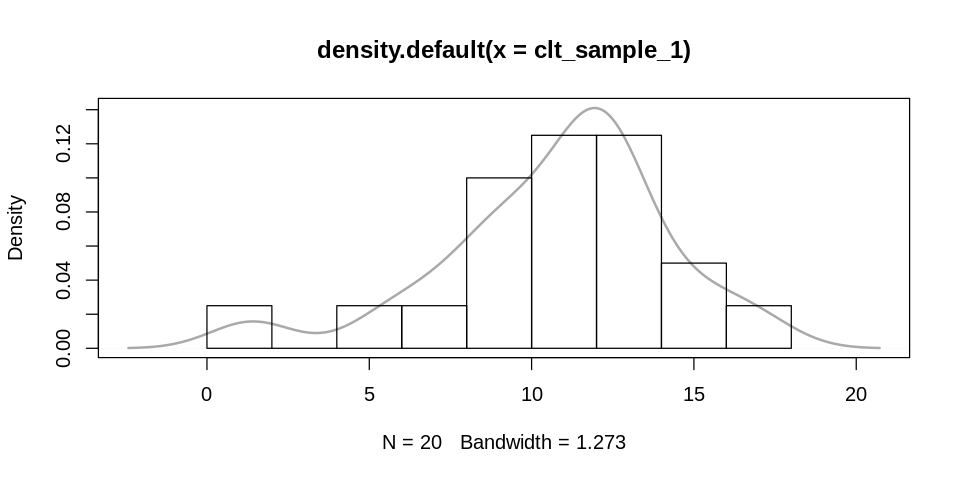

In [11]:
plot(density(clt_sample_1), col="darkgrey", lwd=2) 
hist(clt_sample_1, probability = T, add = T)

**Draw a large k number of samples, with sample size = n**:

In [12]:
# Repeatedly sample for k times, create a matrix/array to store these samples
clt_k = 10000 # or called 'N', but this can be confusing due to N can also be population size. Thus we use 'k' here.

set.seed(88) # Repeatable sampling using pseudo random methold
clt_sample_k <- (replicate(clt_k, sample(x = ASD_State_SPED_2016$Prevalence, size = clt_n, replace = TRUE)))

# first few samples
clt_sample_k[, 1:6]

11.2,9.5,11.2,8.3,8.3,6.9
9.5,11.9,10.4,11.9,11.9,15.2
16.9,6.9,9.3,1.4,15.4,19.4
6.9,13.0,19.4,12.7,8.5,15.1
11.2,8.3,12.1,9.1,11.2,12.1
8.2,12.1,10.1,14.2,10.2,1.4
12.7,10.8,12.1,8.6,9.5,15.1
9.5,15.2,14.1,14.1,10.8,6.9
1.4,8.7,12.5,16.7,9.8,9.5
12.7,9.0,5.5,13.9,19.4,14.2
10.1,9.3,9.5,9.5,14.2,19.4


In [13]:
# last sample
clt_sample_k[, clt_k]

[1]  8.6 14.1 12.1 19.4 12.7 10.3 10.3 11.2 10.4  9.0 10.4 13.9  9.3 14.2 11.0
[16] 12.1  9.5 10.1 13.0 15.2

In [14]:
# mean values of first few samples
mean(clt_sample_k[, 1])
mean(clt_sample_k[, 2])
mean(clt_sample_k[, 3])
mean(clt_sample_k[, 4])
mean(clt_sample_k[, 5])
mean(clt_sample_k[, 6])

# or use apply() function to loop
apply(clt_sample_k[, 1:6], 2, mean)

[1] 10.745

[1] 9.94

[1] 12.705

[1] 10.67

[1] 12.045

[1] 12.795

[1] 10.745  9.940 12.705 10.670 12.045 12.795

In [15]:
# std-dev values of first few samples
sd(clt_sample_k[, 1])
sd(clt_sample_k[, 2])
sd(clt_sample_k[, 3])
sd(clt_sample_k[, 4])
sd(clt_sample_k[, 5])
sd(clt_sample_k[, 6])

# or use apply() function to loop
apply(clt_sample_k[, 1:6], 2, sd)

[1] 3.521584

[1] 3.75295

[1] 3.571153

[1] 4.010263

[1] 3.178956

[1] 5.011405

[1] 3.521584 3.752950 3.571153 4.010263 3.178956 5.011405

**k sample's distributions (k many)**

[[1]]
$breaks
 [1]  0  2  4  6  8 10 12 14 16 18

$counts
[1] 1 0 1 1 4 5 5 2 1

$density
[1] 0.025 0.000 0.025 0.025 0.100 0.125 0.125 0.050 0.025

$mids
[1]  1  3  5  7  9 11 13 15 17

$xname
[1] "newX[, i]"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"

[[2]]
$breaks
[1]  0  2  4  6  8 10 12 14 16

$counts
[1] 2 0 0 1 7 4 3 3

$density
[1] 0.050 0.000 0.000 0.025 0.175 0.100 0.075 0.075

$mids
[1]  1  3  5  7  9 11 13 15

$xname
[1] "newX[, i]"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"

[[3]]
$breaks
[1]  4  6  8 10 12 14 16 18 20

$counts
[1] 1 0 3 4 5 3 2 2

$density
[1] 0.025 0.000 0.075 0.100 0.125 0.075 0.050 0.050

$mids
[1]  5  7  9 11 13 15 17 19

$xname
[1] "newX[, i]"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"

[[4]]
$breaks
 [1]  0  2  4  6  8 10 12 14 16 18

$counts
[1] 2 0 0 1 4 4 4 4 1

$density
[1] 0.050 0.000 0.000 0.025 0.100 0.100 0.100 0.100 0.025

$mids
[1]  1  3  5  7  9 11 13 15 17

$xname
[1] "newX[, i]"

$equidist
[1] TRUE

attr(,"cla

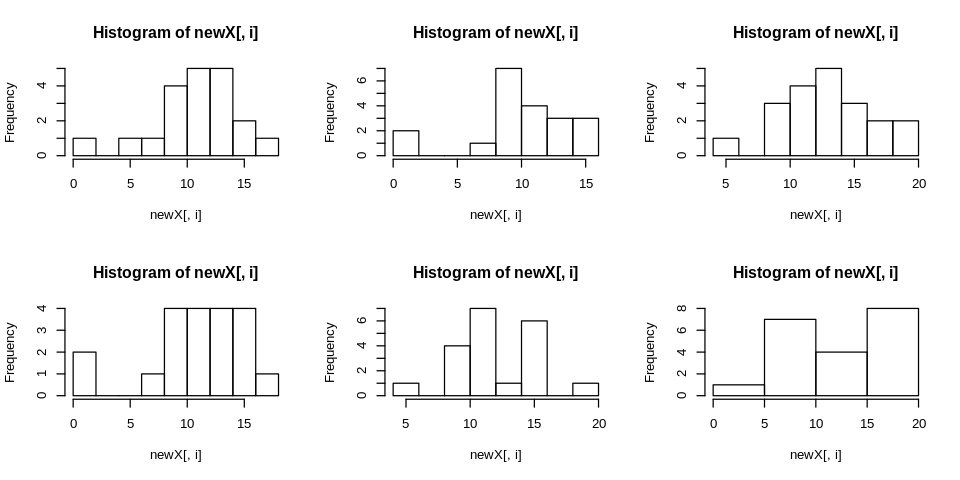

In [16]:
# ----------------------------------
# k sample's distributions (k many)
# ----------------------------------
# Show the first few sample's histogram
par(mfrow=c(2, 3))
apply(clt_sample_k[, 1:6], 2, FUN=hist)
# Reset
par(mfrow=c(1, 1))

**Show the first few sample's density, together with Population**

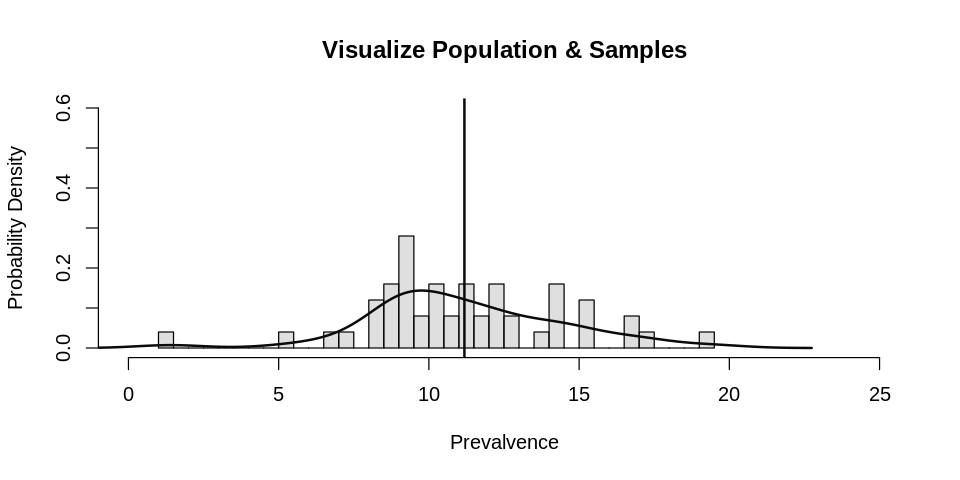

In [17]:
# Show the first few sample's density, together with Population
# Population (Prevalence) histogram in probablity
hist(ASD_State_SPED_2016$Prevalence, probability = T, 
     col=rgb(0.75,0.75,0.75,0.5), breaks = 50,
     xlab = 'Prevalvence', xlim = (c(0, 25)),
     ylab = 'Probability Density', 
     ylim = (c(0, 0.6)),
     main = 'Visualize Population & Samples')

# Overlay curve:
# Population (Prevalence) density
lines(density(ASD_State_SPED_2016$Prevalence), col="grey4", lwd=2) 

# Overlay line:
# mean = mean of Population (Prevalence)
abline(v=mean(ASD_State_SPED_2016$Prevalence), col="grey4", lwd=2) 

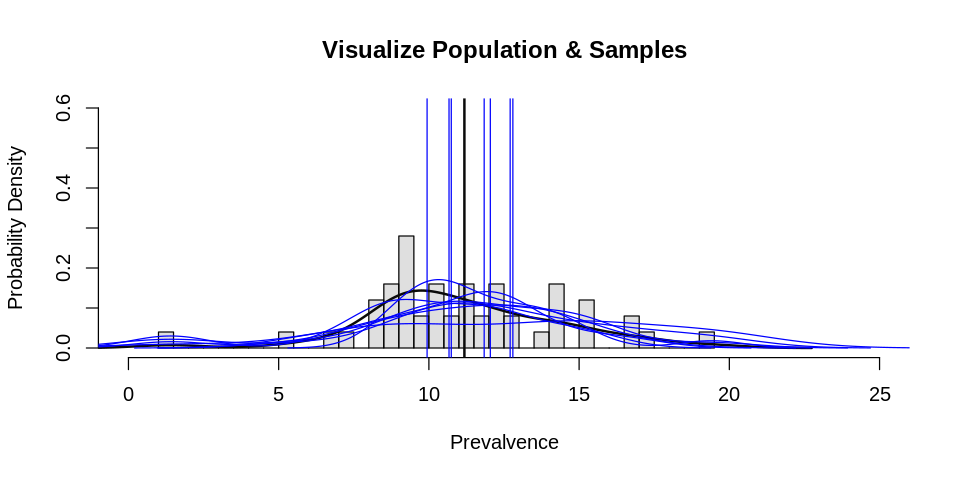

In [18]:
# Show the first few sample's density, together with Population
# Population (Prevalence) histogram in probablity
hist(ASD_State_SPED_2016$Prevalence, probability = T, 
     col=rgb(0.75,0.75,0.75,0.5), breaks = 50,
     xlab = 'Prevalvence', xlim = (c(0, 25)),
     ylab = 'Probability Density', 
     ylim = (c(0, 0.6)),
     main = 'Visualize Population & Samples')

# Overlay curve:
# Population (Prevalence) density
lines(density(ASD_State_SPED_2016$Prevalence), col="grey4", lwd=2) 

# Overlay line:
# mean = mean of Population (Prevalence)
abline(v=mean(ASD_State_SPED_2016$Prevalence), col="grey4", lwd=2) 

# Overlay:
# First few sample's density & mean
lines(density(clt_sample_k[, 1]), col="blue", lwd=1) 
abline(v=mean(clt_sample_k[, 1]), col="blue", lwd=1) 

lines(density(clt_sample_k[, 2]), col="blue", lwd=1) 
abline(v=mean(clt_sample_k[, 2]), col="blue", lwd=1) 

lines(density(clt_sample_k[, 3]), col="blue", lwd=1) 
abline(v=mean(clt_sample_k[, 3]), col="blue", lwd=1) 

lines(density(clt_sample_k[, 4]), col="blue", lwd=1) 
abline(v=mean(clt_sample_k[, 4]), col="blue", lwd=1) 

lines(density(clt_sample_k[, 5]), col="blue", lwd=1) 
abline(v=mean(clt_sample_k[, 5]), col="blue", lwd=1) 

lines(density(clt_sample_k[, 6]), col="blue", lwd=1) 
abline(v=mean(clt_sample_k[, 6]), col="blue", lwd=1) 

lines(density(clt_sample_k[, clt_k]), col="blue", lwd=1) 
abline(v=mean(clt_sample_k[, clt_k]), col="blue", lwd=1) 

# We can see that sample's distributions are all different.

**<span style="color:blue">[ Tips ]</span> We notice that sample's distributions are all different.**

**Create <span style="color:blue">Sampling Distribution</span> (only one):**

In [19]:
# ----------------------------------
# Sampling distribution (only one)
# ----------------------------------
# Calculate sample mean value for k samples
clt_sample_k_mean <- apply(clt_sample_k, 2, mean)
# Show first few sample means
clt_sample_k_mean[1:6]

[1] 10.745  9.940 12.705 10.670 12.045 12.795

In [20]:
# Calculate sample std-dev value for each individual sample (totally k std-dev)
clt_sample_k_sd <- apply(clt_sample_k, 2, sd)
# Show first few samples' std-dev
clt_sample_k_sd[1:6]

[1] 3.521584 3.752950 3.571153 4.010263 3.178956 5.011405

In [21]:
# Calculate std-dev value for Sampling DIsdtribution (only one std-dev)
sd(clt_sample_k_mean)

[1] 0.7133367

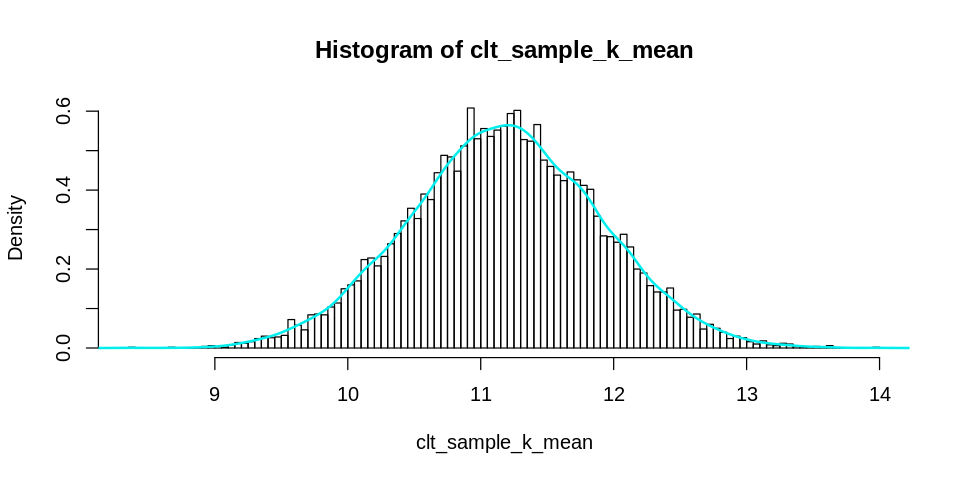

In [22]:
# histogram of sample means (Sampling distribution of the mean)
hist(clt_sample_k_mean, probability = T, breaks = 100)
lines(density(clt_sample_k_mean), col="cyan2", lwd=2) 

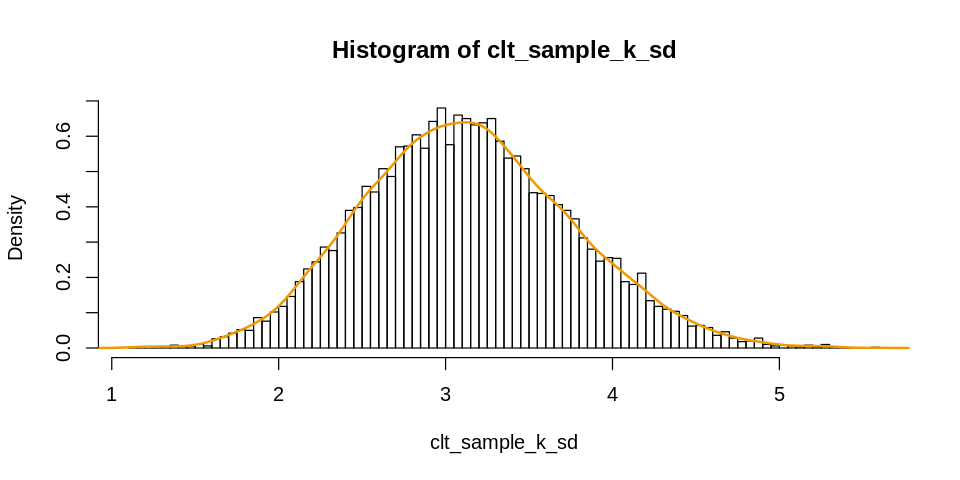

In [23]:
# histogram of sample std-dev
hist(clt_sample_k_sd, probability = T, breaks = 100)
lines(density(clt_sample_k_sd), col="orange2", lwd=2) 

In [24]:
# k *Sample* (sample size = n) mean Prevalence
mean(clt_sample_k_mean)

[1] 11.17881

In [25]:
# *Population* mean Prevalence
mean(ASD_State_SPED_2016$Prevalence)

[1] 11.182

**<span style="color:blue">[ Tips ]</span> We notice that the above two means are close.**

**Visualise: Central Limit Theorem (CLT)**

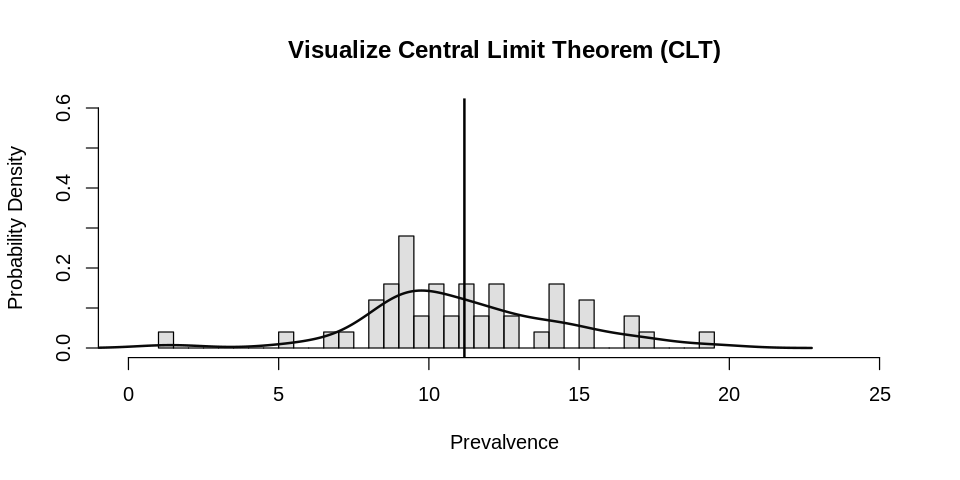

In [26]:
# ----------------------------------
# Sampling distribution vs. Population distribution vs. Z-Norm
# ----------------------------------
# Create:
# Population (Prevalence) histogram in probablity
hist(ASD_State_SPED_2016$Prevalence, probability = T, 
     col=rgb(0.75,0.75,0.75,0.5), breaks = 50,
     xlab = 'Prevalvence', xlim = (c(0, 25)),
     ylab = 'Probability Density', ylim = (c(0, 0.6)),
     main = 'Visualize Central Limit Theorem (CLT)')

# Overlay curve:
# Population (Prevalence) density
lines(density(ASD_State_SPED_2016$Prevalence), col="grey4", lwd=2) 

# Overlay line:
# mean = mean of Population (Prevalence)
abline(v=mean(ASD_State_SPED_2016$Prevalence), col="black", lwd=2) 

**Overlay: Sample means histogram in probability (Sampling disribution)**

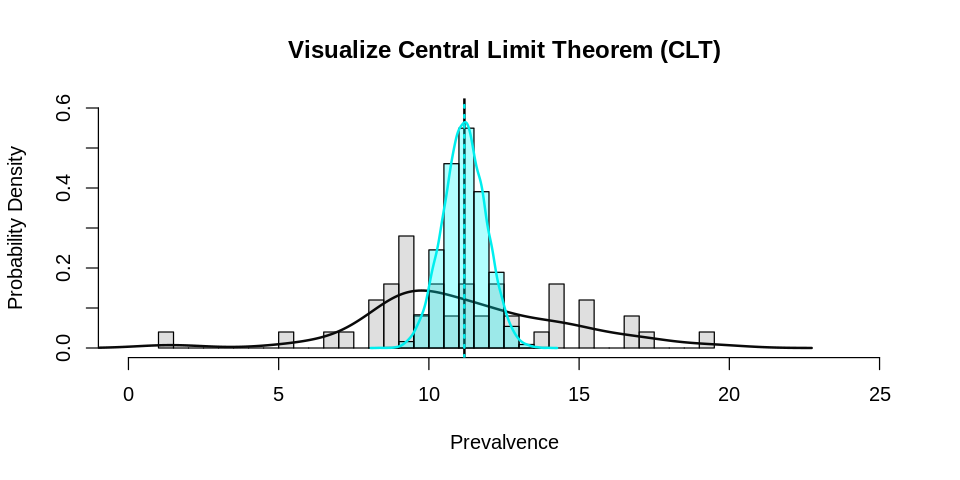

In [27]:
# ----------------------------------
# Sampling distribution vs. Population distribution vs. Z-Norm
# ----------------------------------
# Create:
# Population (Prevalence) histogram in probablity
hist(ASD_State_SPED_2016$Prevalence, probability = T, 
     col=rgb(0.75,0.75,0.75,0.5), breaks = 50,
     xlab = 'Prevalvence', xlim = (c(0, 25)),
     ylab = 'Probability Density', ylim = (c(0, 0.6)),
     main = 'Visualize Central Limit Theorem (CLT)')

# Overlay curve:
# Population (Prevalence) density
lines(density(ASD_State_SPED_2016$Prevalence), col="grey4", lwd=2) 

# Overlay line:
# mean = mean of Population (Prevalence)
abline(v=mean(ASD_State_SPED_2016$Prevalence), col="black", lwd=2) 

# Overlay line:
# Sample means histogram in probability (Sampling disribution)
hist(clt_sample_k_mean, probability = T, 
     col=rgb(0,1,1,0.3), # https://www.dataanalytics.org.uk/make-transparent-colors-in-r/
     add=T)

# Overlay curve:
# Sample (Prevalence) density (Sampling disribution)
lines(density(clt_sample_k_mean), col="cyan2", lwd=2) 
# Overlay line:
# mean of Sampling distribution (of Prevelance, sample size n) 
abline(v=mean(clt_sample_k_mean), col="cyan2", lwd=2, lty=3) 

< How to make transparent colors in R > https://www.dataanalytics.org.uk/make-transparent-colors-in-r/


In [28]:
col2rgb(c("cyan", "grey", "purple", "orange")) / 255

red,0,0.745098,0.6274510,1.0000000
green,1,0.745098,0.1254902,0.6470588
blue,1,0.745098,0.9411765,0.0000000


In [29]:
# Recall:
# k *Sample* (sample size = n) mean Prevalence
mean(clt_sample_k_mean)
# *Population* mean Prevalence
mean(ASD_State_SPED_2016$Prevalence)
# We see that the above two means are close. Good estimation!

[1] 11.17881

[1] 11.182

**<span style="color:blue">[ Tips ]</span> We notice that the above two means are close. <span style="color:blue">Good estimation!</span>**

**Standard Error (SE) (of mean prevalence), can be estimated as: std-dev of the Sampling distribution (of mean prevalence):**

In [30]:
# ----------------------------------
# Standard Error (SE) (of mean prevalence), can be estimated as:
# std-dev of the Sampling distribution (of mean prevalence)
# ----------------------------------
# https://en.wikipedia.org/wiki/Sampling_distribution

# [1] Actual SE: When Population std-dev is known, SE using Population standard deviation:
sd.p(ASD_State_SPED_2016$Prevalence) / sqrt(clt_n)

# [2] Estimated SE with k samples: When Population std-dev is NOT known, but many sample means are known, SE using standard deviation of Sampling distribution
sd(clt_sample_k_mean)

# [3] Estimated SE with only one sample: When Population std-dev is NOT known, and only one sample obtained, SE using Sample's standard deviation: (std-dev of 1 Sample)
clt_sample_k_sd[1] / sqrt(clt_n)

[1] 0.7157051

[1] 0.7133367

[1] 0.7874501

**Overlay: <span style="color:blue">Theoretic Sampling Distribution</span> with population mean & std-dev = Actual SE:**

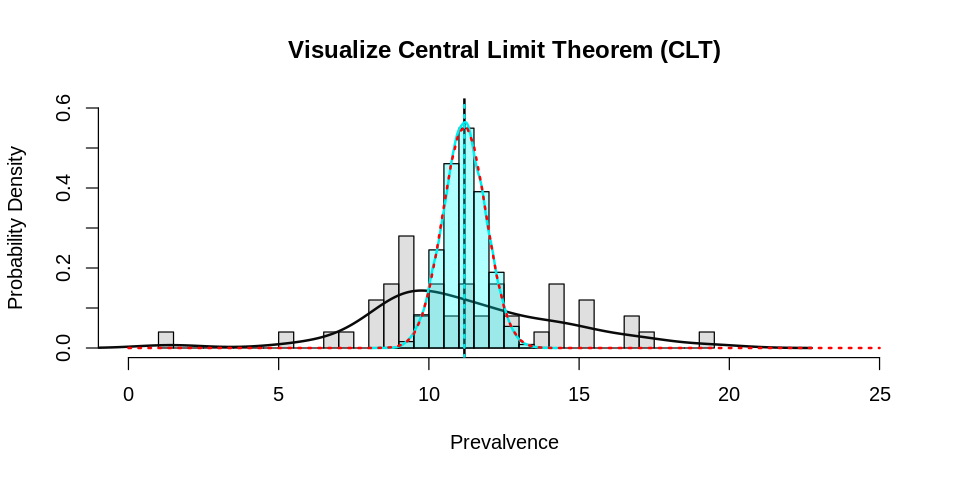

In [31]:
# ----------------------------------
# Sampling distribution vs. Population distribution vs. Z-Norm
# ----------------------------------
# Create:
# Population (Prevalence) histogram in probablity
hist(ASD_State_SPED_2016$Prevalence, probability = T, 
     col=rgb(0.75,0.75,0.75,0.5), breaks = 50,
     xlab = 'Prevalvence', xlim = (c(0, 25)),
     ylab = 'Probability Density', ylim = (c(0, 0.6)),
     main = 'Visualize Central Limit Theorem (CLT)')

# Overlay curve:
# Population (Prevalence) density
lines(density(ASD_State_SPED_2016$Prevalence), col="grey4", lwd=2) 

# Overlay line:
# mean = mean of Population (Prevalence)
abline(v=mean(ASD_State_SPED_2016$Prevalence), col="black", lwd=2) 

# Overlay line:
# Sample means histogram in probability (Sampling disribution)
hist(clt_sample_k_mean, probability = T, 
     col=rgb(0,1,1,0.3), # https://www.dataanalytics.org.uk/make-transparent-colors-in-r/
     add=T)

# Overlay curve:
# Sample (Prevalence) density (Sampling disribution)
lines(density(clt_sample_k_mean), col="cyan2", lwd=2) 
# Overlay line:
# mean of Sampling distribution (of Prevelance, sample size n) 
abline(v=mean(clt_sample_k_mean), col="cyan2", lwd=2, lty=3) 

# Overlay curve:
# *Theoretic Sampling Distribution* with population mean & std-dev = Actual SE
# mean = mean of Population (Prevalence) & std-dev = std-dev of Population (Prevalence) / square root of sample size n
curve(dnorm(x, 
            mean(ASD_State_SPED_2016$Prevalence), # Actual Population mean
            sd.p(ASD_State_SPED_2016$Prevalence) / sqrt(clt_n)), # Actual SE (for mean prevalence) = Population standard deviation / square root of sample size
      add=TRUE, col="red", lwd=2, lty=3)

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <h3>
    Sampling & Normality - Evaluate Normality
    </h3>
</div>


**Use QQ Plot**

< Construct a Quantile-Quantile Plot (QQ plot) > https://youtu.be/okjYjClSjOg


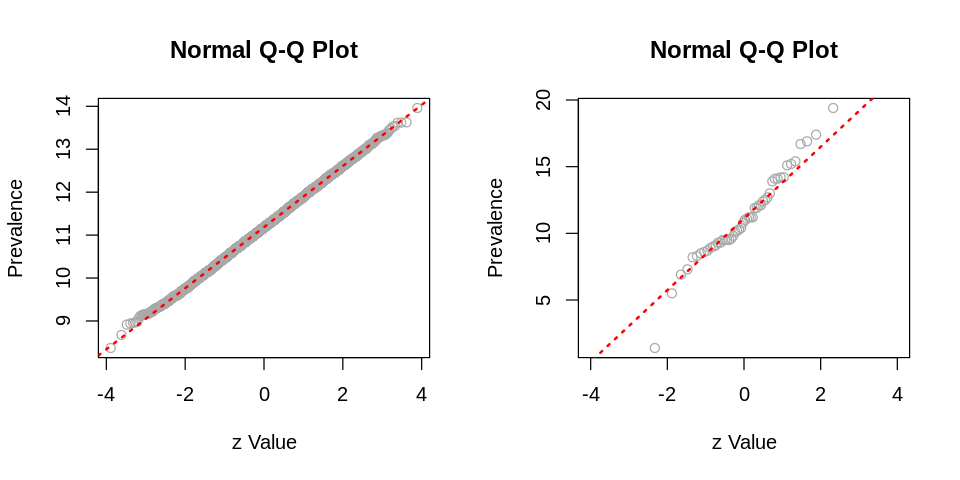

In [32]:
# ----------------------------------
# Evaluate normality
# ----------------------------------
# Construct a Quantile-Quantile Plot (QQ plot)
# https://youtu.be/okjYjClSjOg

par(mfrow=c(1, 2))
# Sample means
qqnorm(clt_sample_k_mean, col="darkgrey", 
#       xlim=(c(-4, 4)), ylim=(c(0, 20)),
       xlab="z Value", ylab="Prevalence")
qqline(clt_sample_k_mean, col="red", lwd=2, lty=3)
# Population
qqnorm(ASD_State_SPED_2016$Prevalence, col="darkgrey", 
       xlim=(c(-4, 4)),
       xlab="z Value", ylab="Prevalence")
qqline(ASD_State_SPED_2016$Prevalence, col="red", lwd=2, lty=3)
# Reset
par(mfrow=c(1, 1))


**<span style="color:blue">[ Tips ]</span> If most/all data points are aligned with the red straight line, then the underlying data points are normally distributed.**

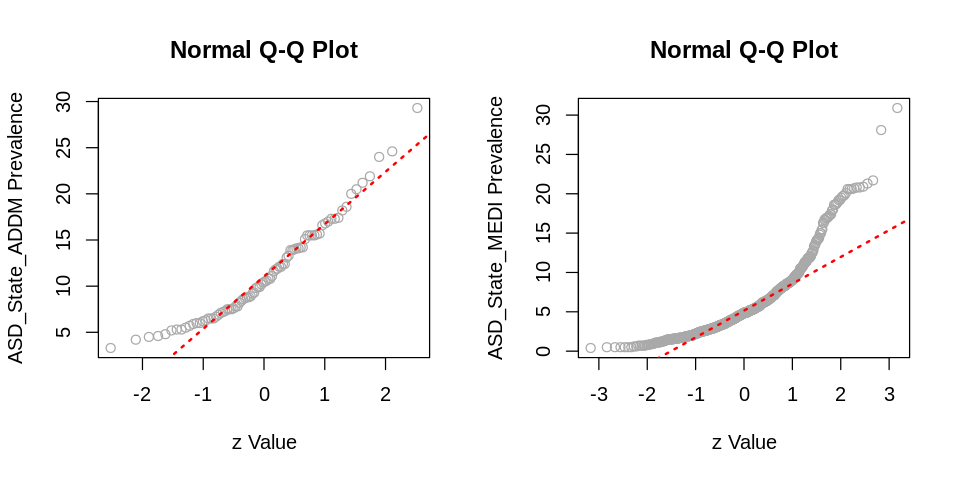

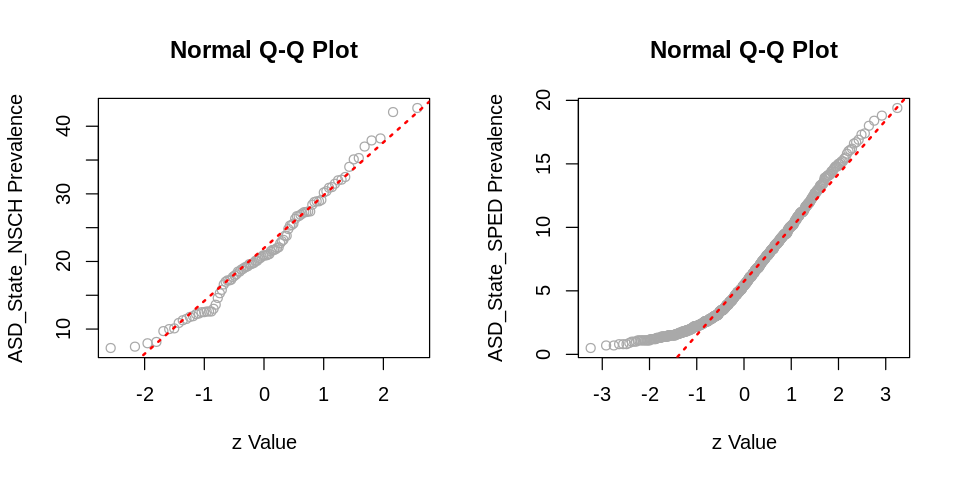

In [33]:
# ----------------------------------
# Evaluate normality
# ----------------------------------
par(mfrow=c(1, 2))

# ASD_State_ADDM$Prevalence
qqnorm(ASD_State_ADDM$Prevalence, col="darkgrey", 
#       xlim=(c(-4, 4)), ylim=(c(0, 20)),
       xlab="z Value", ylab="ASD_State_ADDM Prevalence")
qqline(ASD_State_ADDM$Prevalence, col="red", lwd=2, lty=3)
# plot(density(ASD_State_ADDM$Prevalence))

# ASD_State_MEDI$Prevalence
qqnorm(ASD_State_MEDI$Prevalence, col="darkgrey", 
#       xlim=(c(-4, 4)), ylim=(c(0, 20)),
       xlab="z Value", ylab="ASD_State_MEDI Prevalence")
qqline(ASD_State_MEDI$Prevalence, col="red", lwd=2, lty=3)

# ASD_State_NSCH$Prevalence
qqnorm(ASD_State_NSCH$Prevalence, col="darkgrey", 
#       xlim=(c(-4, 4)), ylim=(c(0, 20)),
       xlab="z Value", ylab="ASD_State_NSCH Prevalence")
qqline(ASD_State_NSCH$Prevalence, col="red", lwd=2, lty=3)

# ASD_State_SPED$Prevalence
qqnorm(ASD_State_SPED$Prevalence, col="darkgrey", 
#       xlim=(c(-4, 4)), ylim=(c(0, 20)),
       xlab="z Value", ylab="ASD_State_SPED Prevalence")
qqline(ASD_State_SPED$Prevalence, col="red", lwd=2, lty=3)

# Reset
par(mfrow=c(1, 1))


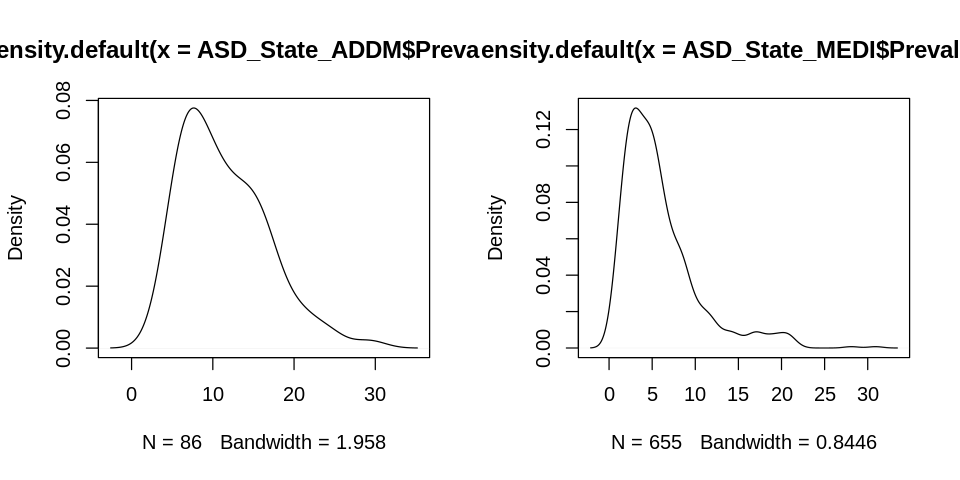

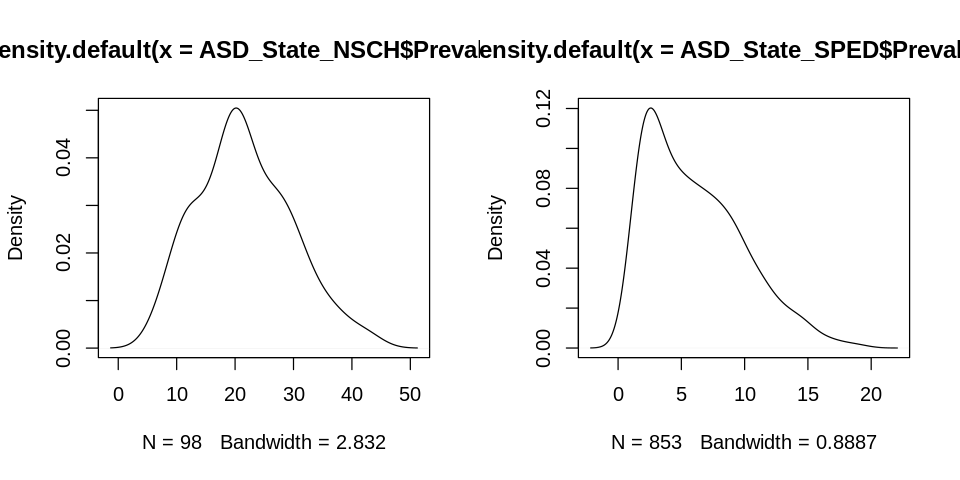

In [34]:
# ----------------------------------
# Evaluate normality
# ----------------------------------
par(mfrow=c(1, 2))
plot(density(ASD_State_ADDM$Prevalence))
plot(density(ASD_State_MEDI$Prevalence))
plot(density(ASD_State_NSCH$Prevalence))
plot(density(ASD_State_SPED$Prevalence))
# Reset
par(mfrow=c(1, 1))

In [35]:
# Alternatively, use shapiro.test() to test Normality
set.seed(88)

# Test data of k smaple's means (Sampling Distribution data):
shapiro.test(sample(x = clt_sample_k_mean, size = 1000))

# Test data of population's Prevalence values (Population Distribution data):
shapiro.test(ASD_State_SPED_2016$Prevalence)


	Shapiro-Wilk normality test

data:  sample(x = clt_sample_k_mean, size = 1000)
W = 0.99904, p-value = 0.8907



	Shapiro-Wilk normality test

data:  ASD_State_SPED_2016$Prevalence
W = 0.96985, p-value = 0.2282


**<span style="color:blue">[ Tips ]</span> General speaking, if <span style="color:blue">p-value</span> is greater than <span style="color:blue">0.05 (meaning more than 5% chance of being normally distributed)</span>, then the underlying data points are normally distributed.**

<div class="alert alert-block alert-info" style="margin-top: 20px">
</div>



## <span style="color:blue">Confidence Interval (CI)</span>


<div class="alert alert-block alert-info" style="margin-top: 20px">
    <h3>
    Confidence Interval (CI) - Mean Estimation & Its CI
    </h3>
</div>


**Use a <span style="color:blue">Sample statistic (e.g. mean)</span> to estimate a <span style="color:blue">population statistic (e.g. mean)</span>. And quantitatively calculate the confidence of the estimation.**

In [36]:
# ----------------------------------
# Use a sample of a few US. State's ASD prevalence (mean) to estimate:
# Average prevalence of ALL US. States (the *Population*) [Source SPED, Year 2016]
# ----------------------------------
dim(ASD_State_SPED_2016)
#
ASD_State_SPED_2016 # This is considered as a population now.

[1] 50  2

,State,Prevalence
1643,AL,9.1
1644,AK,10.1
1645,AZ,10.4
1646,AR,9.5
1647,CA,13.9
1648,CO,7.3
1649,CT,15.4
1650,DE,11.1
1651,DC,11.9
1652,FL,12.1


**Draw a  <span style="color:blue">Sample</span> from ASD_State_SPED_2016$Prevalence**

In [37]:
# Create a *Sample* from ASD_State_SPED_2016$Prevalence,
# with sample size n =
clt_n = 10
# Try 20 or 40, larger sample size, narrower the CI (more confident at xx% level)
# clt_n = 20 

set.seed(88)
clt_sample_1 = sample(x = ASD_State_SPED_2016$Prevalence, size = clt_n, replace = FALSE)
clt_sample_1

[1] 11.2  9.5 16.9  6.9 11.2  8.2 12.7  9.5  1.4 10.2

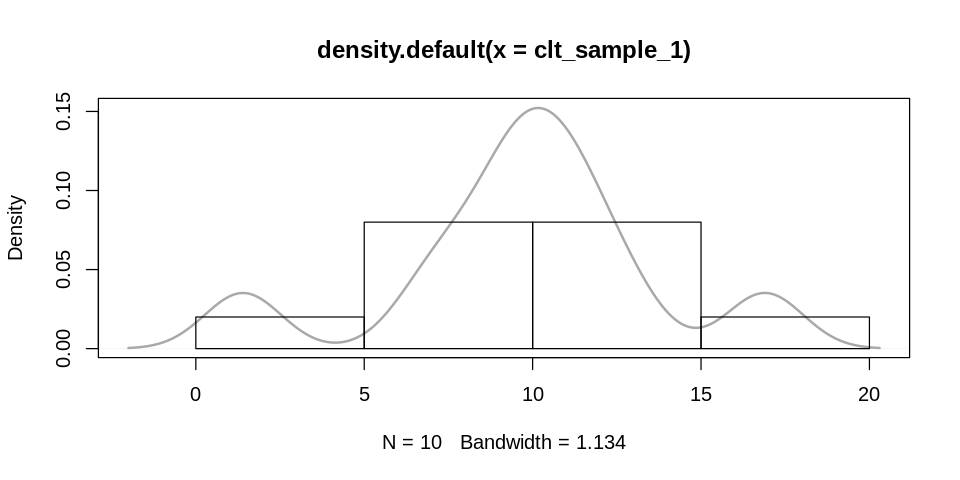

In [38]:
plot(density(clt_sample_1), col="darkgrey", lwd=2) 
hist(clt_sample_1, probability = T, add = T)

In [39]:
# Sample mean Prevalence
mean(clt_sample_1)

# *Population* mean Prevalence
mean(ASD_State_SPED_2016$Prevalence)

[1] 9.77

[1] 11.182

**1. Calculate Confidence Interval of mean estimation: <span style="color:blue">CI using Z (Standard Normal) distribution</span>**

In [40]:
# ----------------------------------
# CI using Z (Standard Normal) distribution
# ----------------------------------
# sample mean
sample_mean = mean(clt_sample_1)
sample_mean

[1] 9.77

In [41]:
# sample size n
sample_size_n = length(clt_sample_1)
sample_size_n

[1] 10

In [42]:
# sample standard deviation
sample_sd = sd(clt_sample_1)
sample_sd

[1] 4.008339

In [43]:
# sample standard error
sample_se = sample_sd / sqrt(sample_size_n)
sample_se

[1] 1.267548

In [44]:
# 95% quantile (z score)
z_score = qnorm(p = 0.975)
z_score

[1] 1.959964

In [45]:
# ?qnorm

In [46]:
# CI using Z distribution
sample_ci = z_score * sample_se
sample_ci

[1] 2.484348

In [47]:
# Lower CI: mean + CI
sample_mean - sample_ci

# Upper CI: mean + CI
sample_mean + sample_ci

# Display
cat('\t< Confidence Interval (Prevalence) >\n',  '\tLower CI : ',  
    sample_mean - sample_ci, '\tMean : ', 
    sample_mean, '\tUpper CI : ',  
    sample_mean + sample_ci)

[1] 7.285652

[1] 12.25435

	< Confidence Interval (Prevalence) >
 	Lower CI :  7.285652 	Mean :  9.77 	Upper CI :  12.25435

**<span style="color:blue">[ ? ]</span> Is the population mean in this CI range?**

**2. Calculate Confidence Interval of mean estimation: <span style="color:blue">CI using T distribution</span>**

In [48]:
# ----------------------------------
# CI using T distribution
# ----------------------------------
# sample mean
sample_mean = mean(clt_sample_1)
sample_mean
# sample size n
sample_size_n = length(clt_sample_1)
sample_size_n
# sample standard deviation
sample_sd = sd(clt_sample_1)
sample_sd
# sample standard error
sample_se = sample_sd / sqrt(sample_size_n)
sample_se

[1] 9.77

[1] 10

[1] 4.008339

[1] 1.267548

In [49]:
# 95% quantile (t score)
t_score = qt(p = 0.975, df = sample_size_n - 1)
t_score

[1] 2.262157

In [50]:
# ?qt

In [51]:
# CI using T distribution
sample_ci = t_score * sample_se
sample_ci

# Lower CI: mean + CI
sample_mean - sample_ci

# Upper CI: mean + CI
sample_mean + sample_ci

# Display
cat('\t< Confidence Interval (Prevalence) >\n',  '\tLower CI : ',  
    sample_mean - sample_ci, '\tMean : ', 
    sample_mean, '\tUpper CI : ',  
    sample_mean + sample_ci)

[1] 2.867393

[1] 6.902607

[1] 12.63739

	< Confidence Interval (Prevalence) >
 	Lower CI :  6.902607 	Mean :  9.77 	Upper CI :  12.63739

**<span style="color:blue">[ ? ]</span> Is the population mean in this CI range?**

**<span style="color:blue">[ ? ]</span> Compare CIs of Z and T distribution, which CI has wider range? Is it reasonable?**

In [52]:
# Alternatively, calculate CI using t.test() function
t.test(clt_sample_1, conf.level = 0.95)


	One Sample t-test

data:  clt_sample_1
t = 7.7078, df = 9, p-value = 2.976e-05
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
  6.902607 12.637393
sample estimates:
mean of x 
     9.77 


In [53]:
# Two group hypothesis test : sample mean vs. population mean
t.test(clt_sample_1, conf.level = 0.95, mu = mean(ASD_State_SPED_2016$Prevalence))


	One Sample t-test

data:  clt_sample_1
t = -1.114, df = 9, p-value = 0.2942
alternative hypothesis: true mean is not equal to 11.182
95 percent confidence interval:
  6.902607 12.637393
sample estimates:
mean of x 
     9.77 


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
    <h3>
        Quiz:
    </h3>
    <p>
        Obtain CI using smaller/larger sample size (clt_n) at 99% confidence. Compare CI width.
    </p>
    <p>
        Observe: larger sample size, narrower the CI (more confident at xx% level)
    </p>
</div>

In [54]:
# Write your code below and press Shift+Enter to execute 


Double-click <b>here</b> for the solution.

<!-- The answer is below:

# Write your code below and press Shift+Enter to execute 
# Try 5, 20, 40, larger sample size, narrower the CI (more confident at xx% level)
# clt_n = 20


-->

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <h3>
    Confidence Interval (CI) - Proportion Estimation & Its CI
    </h3>
</div>


**Use a <span style="color:blue">Sample statistic (e.g. proportioin)</span> to estimate a <span style="color:blue">population statistic (e.g. proportioin)</span>. And quantitatively calculate the confidence of the estimation.**

In [55]:
# ----------------------------------
# Use a sample of one US. State's ASD prevalence (proportion) to estimate:
# Prevalence of THAT US. State's ALL Children (the *Population*) [Source SPED, Year 2016] 
# ----------------------------------

# No. Children with ASD
ASD  <- ASD_State_SPED$Numerator_ASD[ASD_State_SPED$Year == 2016]
#
str(ASD)

 int [1:50] 6140 1204 10746 4181 79041 5902 7391 1383 782 30920 ...


In [56]:
# No. Children with ASD of first US. State (AL-Alabama)
ASD[1]

[1] 6140

In [57]:
# No. Children surveyed
Children  <- ASD_State_SPED$Denominator[ASD_State_SPED$Year == 2016]
#
str(Children)

 int [1:50] 674701 119217 1033241 440130 5686400 808556 479961 124609 65732 2555399 ...


In [58]:
# No. Children surveyed of first US. State (AL-Alabama)
Children[1]

[1] 674701

**1. Calculate Confidence Interval of proportion estimation: <span style="color:blue">CI using Z score interval  (standard normal distribution)</span>**

In [59]:
# ----------------------------------
# CI using Z score interval  (standard normal distribution)
# https://en.wikipedia.org/wiki/Binomial_proportion_confidence_interval
# ----------------------------------

# sample proportion of first US. State (AL-Alabama) in year 2016 of source SPED
sample_proportion = ASD[1] / Children[1]
sample_proportion # p
1- sample_proportion # q = 1 - p

[1] 0.009100327

[1] 0.9908997

In [60]:
# sample size n
sample_size_n = Children[1]
sample_size_n

[1] 674701

In [61]:
# 95% quantile (z score)
z_score = qnorm(p = 0.975)
z_score

[1] 1.959964

In [62]:
sample_ci = z_score * sqrt(sample_proportion * (1 - sample_proportion) / sample_size_n)
sample_ci

[1] 0.0002265874

In [63]:
# Lower CI: mean + CI
sample_proportion - sample_ci

# Upper CI: mean + CI
sample_proportion + sample_ci

# Display
cat('\t< Confidence Interval >\n',  '\tLower CI : ',  
    sample_proportion - sample_ci, '\tMean : ', 
    sample_proportion, '\tUpper CI : ',  
    sample_proportion + sample_ci)


[1] 0.00887374

[1] 0.009326915

	< Confidence Interval >
 	Lower CI :  0.00887374 	Mean :  0.009100327 	Upper CI :  0.009326915

In [64]:
# Display * 1000 -> Prevalence
cat('\t< Confidence Interval (Prevalence) >\n',  '\tLower CI : ',  
    1000*(sample_proportion - sample_ci), '\tMean : ', 
    1000*sample_proportion, '\tUpper CI : ',  
    1000*(sample_proportion + sample_ci))


	< Confidence Interval (Prevalence) >
 	Lower CI :  8.87374 	Mean :  9.100327 	Upper CI :  9.326915

**<span style="color:blue">[ Tips ]</span> Based above calculation upon [ Source: SPED ] [ Year: 2016 ] data, we have 95% confidence that: The actual AL-Alabama state level ASD prevalence (if ALL childrens in Alabama state were surveyed) would be in the above calculated CI range 95% times.** 

Or, asumming there are 100 different Alabama states exist in 100 parallel universes, we obtained 100 actual prevelance proportions. 95 of them will likely fall into the CI range.

**2. Calculate Confidence Interval of proportion estimation: <span style="color:blue">CI using Wilson score interval</span>**

In [65]:
# ----------------------------------
# CI using Wilson score interval
# https://en.wikipedia.org/wiki/Binomial_proportion_confidence_interval
# ----------------------------------

sample_proportion # = ASD[1] / Children[1]

# Yates' chi-squared test = Wilson score interval with continuity correction - prop.test
prop.test(ASD[1], Children[1], conf.level = 0.95) 

# Pearson's chi-squared test = Wilson score interval - wilson
prop.test(ASD[1], Children[1], conf.level = 0.95, correct = FALSE) 

[1] 0.009100327


	1-sample proportions test with continuity correction

data:  ASD[1] out of Children[1], null probability 0.5
X-squared = 650363, df = 1, p-value < 2.2e-16
alternative hypothesis: true p is not equal to 0.5
95 percent confidence interval:
 0.008875786 0.009330477
sample estimates:
          p 
0.009100327 



	1-sample proportions test without continuity correction

data:  ASD[1] out of Children[1], null probability 0.5
X-squared = 650365, df = 1, p-value < 2.2e-16
alternative hypothesis: true p is not equal to 0.5
95 percent confidence interval:
 0.008876518 0.009329726
sample estimates:
          p 
0.009100327 


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
    <h3>
        Quiz:
    </h3>
    <p>
        Obtain CI of Male.Prevalence propotion [ Source: ADDM] [ Year: 2014 ] at 99% confidence.
    </p>
</div>

In [66]:
# Write your code below and press Shift+Enter to execute 


Double-click <b>here</b> for the solution.

<!-- The answer is below:

# Write your code below and press Shift+Enter to execute 
#
# ------------------------------------
# In order to calculate proportion CI, we need to know below four numbers of difference children group:
# ------------------------------------
# ASD_Male_numb
# Children_Male_numb
# ASD_Female_numb
# Children_Female_numb

# ------------------------------------
# Known facts:
# ------------------------------------

cat('# ------------------------------------
# Known facts:
# ------------------------------------\n')

# ADDM 2014 National level
ASD_National_ADDM$Prevalence[ASD_National_ADDM$Year == 2014]
ASD_National_ADDM$Male.Prevalence[ASD_National_ADDM$Year == 2014]
ASD_National_ADDM$Female.Prevalence[ASD_National_ADDM$Year == 2014]

# ADDM 2014 State level
ASD_State_ADDM$Denominator[ASD_State_ADDM$Year == 2014]
ASD_State_ADDM$Numerator_ASD[ASD_State_ADDM$Year == 2014]
ASD_State_ADDM$Numerator_NonASD[ASD_State_ADDM$Year == 2014]

# ADDM 2014 National level (sum up state level numbers)
sum(ASD_State_ADDM$Denominator[ASD_State_ADDM$Year == 2014])
sum(ASD_State_ADDM$Numerator_ASD[ASD_State_ADDM$Year == 2014])
sum(ASD_State_ADDM$Numerator_NonASD[ASD_State_ADDM$Year == 2014])

# Tally health check for Prevalence proportion
ASD_National_ADDM$Prevalence[ASD_National_ADDM$Year == 2014] == round(1000 * sum(ASD_State_ADDM$Numerator_ASD[ASD_State_ADDM$Year == 2014]) / sum(ASD_State_ADDM$Denominator[ASD_State_ADDM$Year == 2014]), 1)

# ------------------------------------
# Establish relationships/formulas
# ------------------------------------
# Formula 1:
# ASD_Male_numb + ASD_Female_numb = sum(ASD_State_ADDM$Numerator_ASD[ASD_State_ADDM$Year == 2014]) = 5478

# Formula 2:
# ASD_Male_numb / Children_Male_numb = ASD_National_ADDM$Male.Prevalence[ASD_National_ADDM$Year == 2014]/1000 = 26.6/1000

# Formula 3:
# ASD_Female_numb / Children_Female_numb = ASD_National_ADDM$Female.Prevalence[ASD_National_ADDM$Year == 2014]/1000 = 6.6/1000

# Formula 4:
# Children_Male_numb + Children_Female_numb = sum(ASD_State_ADDM$Denominator[ASD_State_ADDM$Year == 2014]) = 325483

# ------------------------------------
# Results
# ------------------------------------
Children_Female_numb = 153843.195876288659794
ASD_Female_numb = 6.6 * Children_Female_numb / 1000
Children_Male_numb = sum(ASD_State_ADDM$Denominator[ASD_State_ADDM$Year == 2014]) - Children_Female_numb
ASD_Male_numb = sum(ASD_State_ADDM$Numerator_ASD[ASD_State_ADDM$Year == 2014]) - ASD_Female_numb

# Rounding to integer
ASD_Male_numb = round(ASD_Male_numb, 0)
ASD_Female_numb = round(ASD_Female_numb, 0)
Children_Male_numb = round(Children_Male_numb, 0)
Children_Female_numb = round(Children_Female_numb, 0)

# Tally health check:
ASD_Male_numb + ASD_Female_numb == sum(ASD_State_ADDM$Numerator_ASD[ASD_State_ADDM$Year == 2014])
Children_Male_numb + Children_Female_numb == sum(ASD_State_ADDM$Denominator[ASD_State_ADDM$Year == 2014])
round(1000 * ASD_Male_numb / Children_Male_numb, 1) == ASD_National_ADDM$Male.Prevalence[ASD_National_ADDM$Year == 2014]
round(1000 * ASD_Female_numb / Children_Female_numb, 1) == ASD_National_ADDM$Female.Prevalence[ASD_National_ADDM$Year == 2014]

cat('# ------------------------------------
# Results:
# ------------------------------------\n')

# There is a slight discrepancy in Male.Prevalence. 
# This is likely due to the 'rounding to one decimal' of: National level Prevalence, State level Male and Female Prevalence in two original ASD data set.
cat('\nRe-calculated Male.Prevalvence  : ', round(1000 * ASD_Male_numb / Children_Male_numb, 1)) # Male.Prevalvence is under valued: 26
cat('\nRe-calculated Female.Prevalence : ', round(1000 * ASD_Female_numb / Children_Female_numb, 1)) # Female.Prevalence is correct: 6.6

# We would accept above calculation and tally check, to proceed below CI calculation.

# Display
cat('\nASD_Male_numb        : ', ASD_Male_numb)
cat('\nASD_Female_numb      : ', ASD_Female_numb)
cat('\nChildren_Male_numb   : ', Children_Male_numb)
cat('\nChildren_Female_numb : ', Children_Female_numb)

# ------------------------------------
# proportion test (with continuity correction) to obtain CI for Male.Prevalence propotion at 99% confidence:
# ------------------------------------
# Yates' chi-squared test = Wilson score interval with continuity correction - prop.test
prop.test(ASD_Male_numb, Children_Male_numb, conf.level = 0.99) 

-->

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
    <h3>
        Quiz:
    </h3>
    <p>
        Obtain CI of Female.Prevalence propotion [ Source: ADDM] [ Year: 2014 ] at 99% confidence.
    </p>
    <p>
        Then Compare CI range with Male children's CI range. Which gender has statistically higer ASD prevalence/proportion?
    </p>
</div>

In [67]:
# Write your code below and press Shift+Enter to execute 


Double-click <b>here</b> for the solution.

<!-- The answer is below:

# Write your code below and press Shift+Enter to execute 
#
ASD_Female_numb
Children_Female_numb
ASD_Female_numb / Children_Female_numb
#
# ------------------------------------
# proportion test (with continuity correction) to obtain CI for Female.Prevalence propotion at 99% confidence:
# ------------------------------------
# Yates' chi-squared test = Wilson score interval with continuity correction - prop.test
prop.test(ASD_Female_numb, Children_Female_numb, conf.level = 0.99) 

# ------------------------------------
# Two group proportion test (with continuity correction)
# ------------------------------------
# Yates' chi-squared test = Wilson score interval with continuity correction - prop.test
prop.test(c(ASD_Male_numb, ASD_Female_numb), c(Children_Male_numb, Children_Female_numb), conf.level = 0.99) 

-->

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <a href="">
    </a>
</div>


### Excellent! You have completed the workshop notebook!

**Connect with the author:**

This notebook was written by [GU Zhan (Sam)](https://sg.linkedin.com/in/zhan-gu-27a82823 "GU Zhan (Sam)").

[Sam](https://www.iss.nus.edu.sg/about-us/staff/detail/201/GU_Zhan "GU Zhan (Sam)") is currently a lecturer in [Institute of Systems Science](https://www.iss.nus.edu.sg/ "NUS-ISS") in [National University of Singapore](http://www.nus.edu.sg/ "NUS"). He devotes himself into pedagogy & andragogy, and is very passionate in inspiring next generation of artificial intelligence lovers and leaders.


Copyright &copy; 2020 GU Zhan

This notebook and its source code are released under the terms of the [MIT License](https://en.wikipedia.org/wiki/MIT_License "Copyright (c) 2020 GU ZHAN").

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.


<div class="alert alert-block alert-info" style="margin-top: 20px">
    <a href="">
    </a>
</div>


## <span style="color:blue">Appendices</span>


<div class="alert alert-block alert-info" style="margin-top: 20px">
    <h3>
    Interactive workshops: < Learning R inside R > using swirl() (in R/RStudio)
    </h3>
</div>


https://github.com/telescopeuser/S-SB-Workshop


<div class="alert alert-block alert-info" style="margin-top: 20px">
    <a href="https://github.com/dd-consulting">
         <img src="../reference/GZ_logo.png" width="60" align="right">
    </a>
</div>


---